# Churn Analysis (Data Science Project)

# 1. Import relevant libraries

In [1]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew


# sklearn modules for data preprocessing-------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#sklearn modules for Model Selection--------------------------------------
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold, StratifiedKFold


#Standard libraries for data visualization---------------------
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix



#Miscellaneous Utilitiy Libraries--------------------------------------

# 2. Set Up the current working directory & Import Dataset

In [2]:
# Step 2: Import the dataset
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Step 3: Read Dataset
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

# 4. Evaluate Data Structure

In [3]:
# Step 4: Evaluate data structure
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
dataset.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [5]:
#Recheck Column Datatypes
dataset.columns.to_series().groupby(dataset.dtypes).groups


{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [6]:
# Converting Total Charges to a numerical data type.
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors='coerce')

In [7]:
dataset.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
#chaeck missing values
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [10]:
dataset.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#Unique values in each categorical variable:
print(dataset["PaymentMethod"].nunique())
dataset["PaymentMethod"].unique()

4


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
print(dataset["Contract"].nunique())
dataset["Contract"].unique()

3


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [14]:
print(dataset["TotalCharges"].nunique())
dataset["TotalCharges"].unique()

6530


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [15]:
print(dataset["customerID"].nunique())
dataset["customerID"].unique()

7043


array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [16]:
#CHecking duplication in the dataset
print(dataset.duplicated().sum())

0


# 6. Clean the Dataset

In [17]:
#Step 6: Clean the Dataset----------------------------------------------------------------------
num_rows_with_na = dataset.isna().any(axis=1).sum()
print(f"Jumlah baris dengan missing value: {num_rows_with_na}")

Jumlah baris dengan missing value: 11


In [18]:
na_cols = dataset.isna().any()

na_cols = na_cols[na_cols == True].reset_index()
na_cols

,index,0
0,TotalCharges,True


In [19]:
na_cols = na_cols["index"].to_list()
na_cols

['TotalCharges']

In [20]:
dataset[dataset.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [21]:
dataset[dataset['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [22]:
dataset[dataset['tenure'] == 1]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,5351-QESIO,Male,0,No,Yes,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.20,No
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7016,1471-GIQKQ,Female,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,No
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


In [23]:
dataset[dataset['TotalCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [24]:
#dataset[dataset['tenure'] == 2]

In [25]:
#Step 7: Take care of missing data---------------------------------------------------------------
for col in dataset.columns[1:]:
  if col in na_cols:
    if dataset[col].dtype != object:
      #dataset[col] = dataset[col].fillna(dataset[col].mean()).round(0)
      dataset[col] = dataset[col].fillna(0)

In [26]:
dataset[dataset['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [27]:
dataset.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [28]:
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


# 8. Check Target Variable Distribution

In [29]:
#Step 8: Check Target Variable Distribution -----------------------------------------------

dataset["Churn"].value_counts()
#

,count
Churn,
No,5174
Yes,1869


In [30]:
dataset["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


<Axes: ylabel='proportion'>

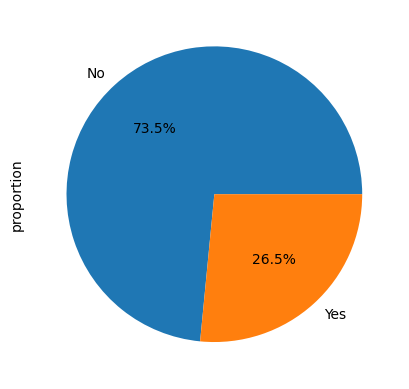

In [31]:
dataset["Churn"].value_counts(normalize=True).plot(kind = 'pie', autopct='%1.1f%%')

What happen here?

Answer: This dataset is imbalanced, as the number of churned customers far exceeds the number of new ones (almost three times). If we use this data to build a machine learning model, the model could be biased towards the majority class ("No").

# 9. Label Encode Binary data

In [32]:
print(dataset.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [33]:
#Step 9: label Encode Binary data----------------------------------------------------------------

#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
      if len(list(dataset[col].unique())) <= 2:
        print(col)
        le.fit(dataset[col])
        dataset[col] = le.transform(dataset[col])
        le_count += 1

print("{} columns were label binary-encoded".format(le_count))

gender
Partner
Dependents
PhoneService
PaperlessBilling
Churn
6 columns were label binary-encoded


In [34]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


1.   Gender: 0 = Female, 1 = Male
2.   Partner: 0 = No, 1 = Yes
3.   Dependents: 0 = No, 1 = Yes
4.   PhoneService: 0 = No, 1 = Yes
5.   PaperlessBilling: 0 = No, 1 = Yes
6.   Churn: 0 = No, 1 = Yes



# 10. Exploratory Data Analysis

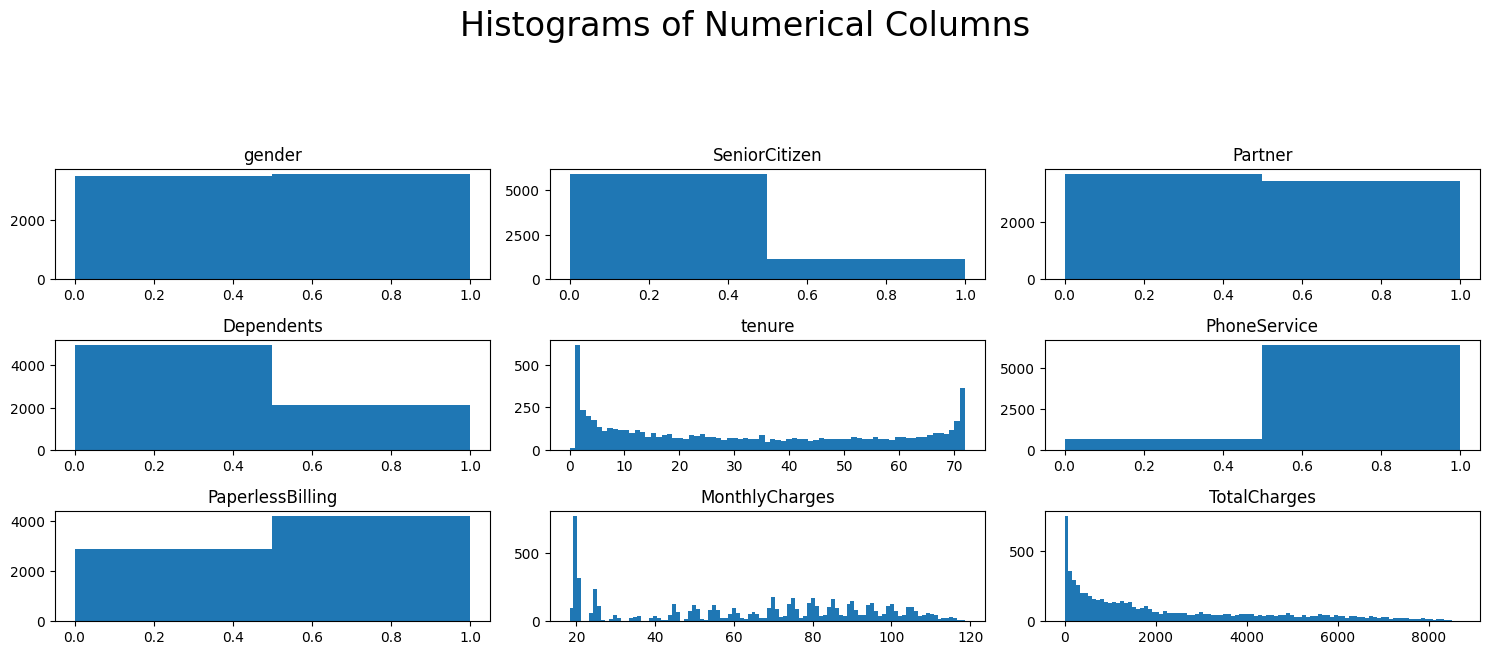

In [35]:
#Step 10: Exploratory Data Analysis----------------------------------------------------------------------

#Step 10.1. Plot Histogram of numeric Columns--------------------------------------

dataset2 = dataset[
    ['gender',
     'SeniorCitizen',
     'Partner',
     'Dependents',
     'tenure',
     'PhoneService',
     'PaperlessBilling',
     'MonthlyCharges',
     'TotalCharges']
]
#Histogram:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',
             horizontalalignment="center",
             fontstyle = "normal",
             fontsize = 24,
             fontfamily = "sans-serif"
             )

for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals)#, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

What are the insights from diagram above?

1. The majority of customers are not seniors and have no dependents.
2. Many customers have low tenure, which could be related to/influence churn.
3. Most customers use telephone services and prefer paperless billing.
4. Monthly cost distribution varies, but many customers fall in the low to mid-range.
5. Total subscription costs increase over time, with a surge in new customers.

In [36]:
dataset['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

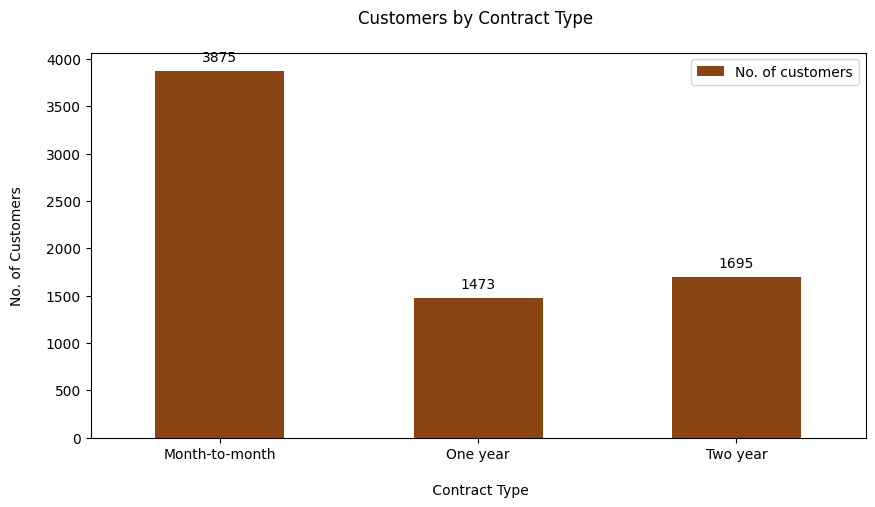

In [37]:
#Step 10.2. Analyze distribution of Key Categorical Variables---------------------------------------------


#(1) Distribution of Contract Type----------------------------------------------------------------------------------------

contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  (contract_split[["No. of customers"]]
       .plot.bar(
           title = 'Customers by Contract Type',
           legend =True,
           table = False,
           grid = False,
           subplots = False,
           figsize =(10, 5), color ='#8B4513', stacked=False))

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

What can be derived from above diagram?

1. The majority of customers are on month-to-month contracts, with 3,875 customers.
2. There are significantly fewer customers on one-year contracts (1,473 customers).
3. There are slightly more customers on two-year contracts than on one-year contracts, but still significantly fewer than on monthly contracts (1,695 customers).

Companies may need to encourage more customers to have long-term contracts to reduce churn.

Churn analysis by contract type can be conducted to see whether customers on monthly contracts have higher churn rates than customers on one- or two-year contracts.

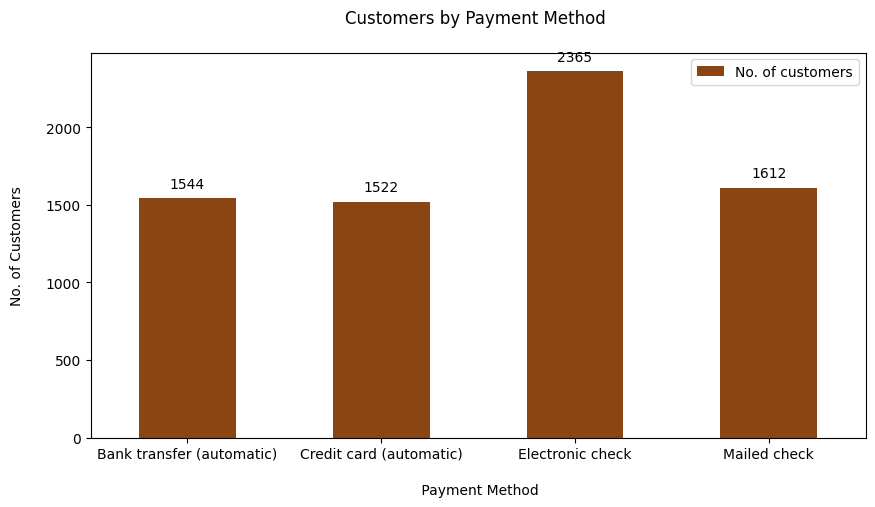

In [38]:
#(2) Distribution of Payment Method Type---------------------------------------------------------------------------------------

payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)


ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False,  subplots = False,  figsize =(10, 5), color ='#8B4513', stacked=False)

plt.ylabel('No. of Customers\n',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('\n Payment Method',horizontalalignment="center",fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Customers by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split [["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

What can be derived from above diagram?

1. The most widely used payment method is "Electronic check", with 2,365 customers.

2. Automatic payment methods such as "Bank transfer (1,544 customers)" and "Credit card (1,522 customers)" have a lower number compared to electronic check.

3. "Mailed check" is used by 1,612 customers, slightly higher compared to bank transfer and automatic credit card.

Customers who use "Electronic check" may have a higher churn rate, because manual payments can be more easily terminated.

The company can encourage customers to switch to automatic payment methods in order to improve retention and reduce churn. Further analysis needs to be conducted regarding the relationship between payment methods and churn rate to ensure whether there is a significant correlation.

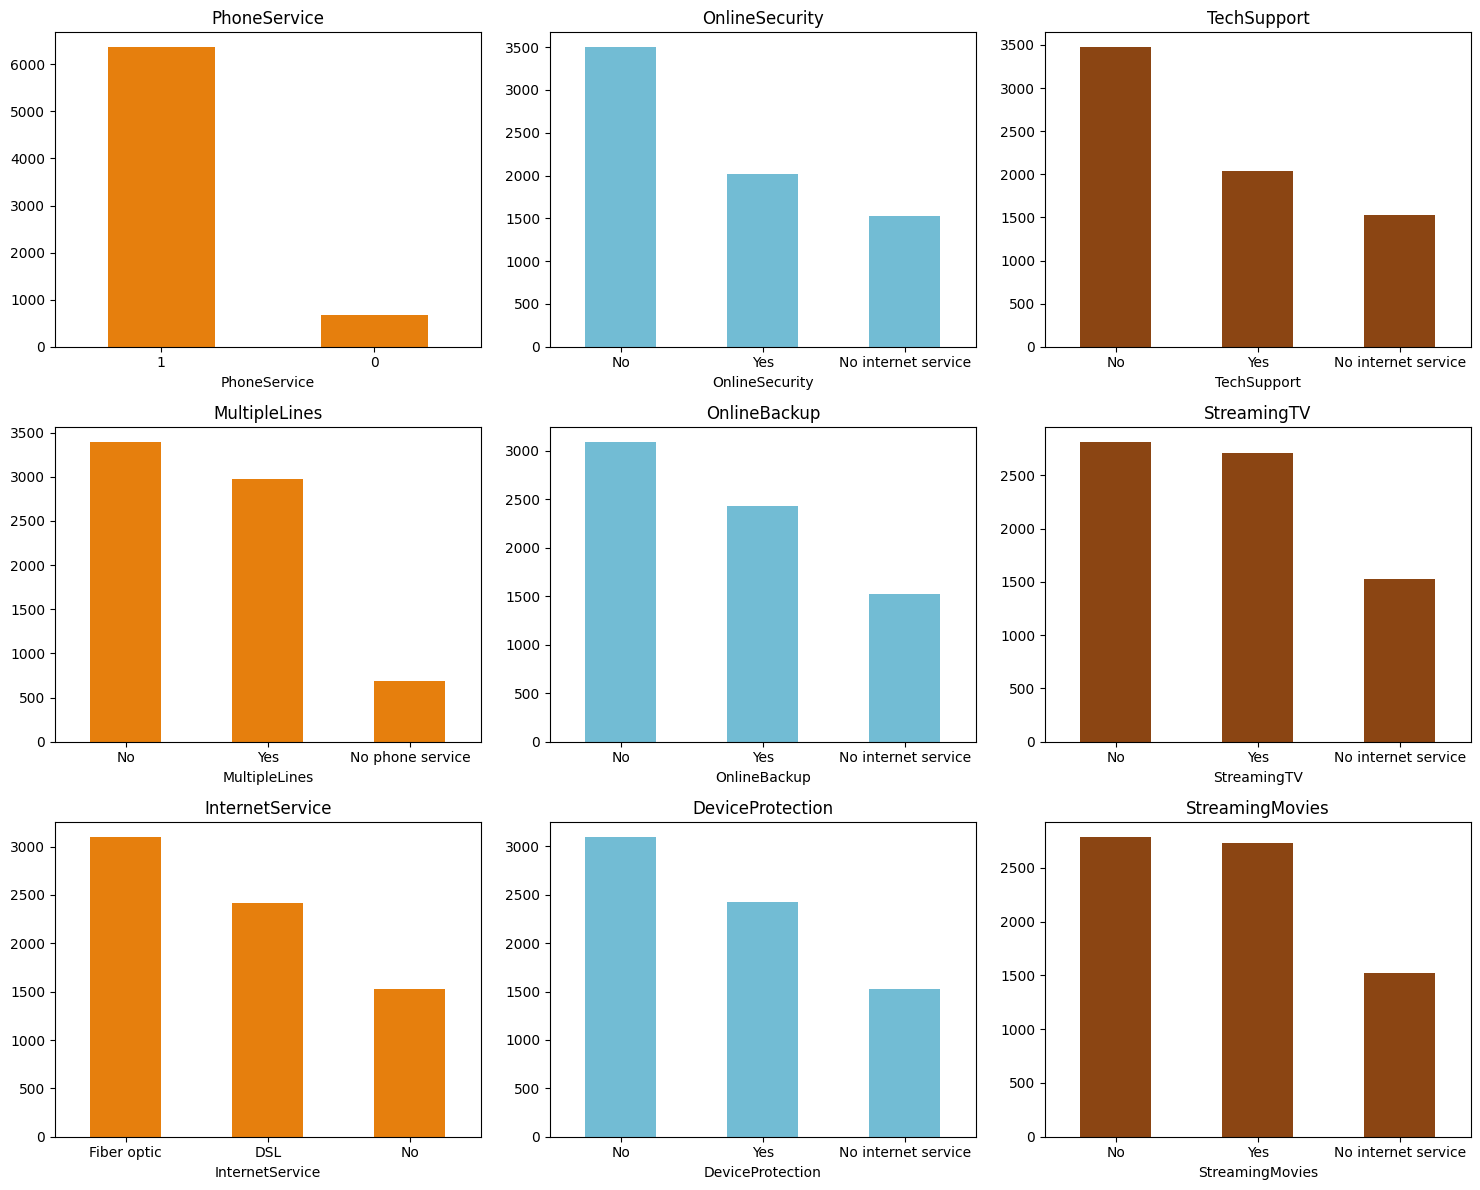

In [39]:
#(3) Distribution of various Label Encoded Categorical Variables---------------------------------------------------------------------------------------

services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color ='#E67F0D' )

    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color ='#72bcd4')

    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color = '#8B4513')
    ax.set_title(item)

plt.tight_layout()

What are the insights from above diagrams?

1. Upselling Opportunity: Many customers do not use additional services such as online security, backup, or device protection. The company can offer bundling packages or promotions to increase the adoption of these services.

2. Churn & Additional Services: Further analysis needs to be conducted to determine whether customers without additional services tend to churn more compared to customers who take complete packages.

3. Technical Support: The low subscription to technical support can be a challenge if customers experience service issues, so the company can consider education programs or discounts to increase the adoption of this service.

4. Streaming Services: There could be a marketing strategy to attract non-streaming customers to start using this service, especially those who already have internet service but have not fully utilized it.

In [40]:
dataset[['Contract', 'Churn']].value_counts()

Contract        Churn
Month-to-month  0        2220
                1        1655
Two year        0        1647
One year        0        1307
                1         166
Two year        1          48
Name: count, dtype: int64

/tmp/ipython-input-582821096.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))


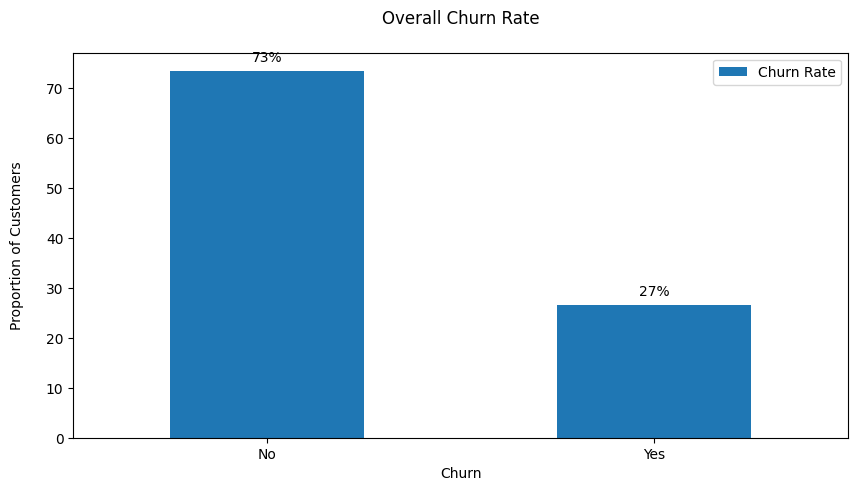

In [41]:
#Step 10.3: Analyze Churn Rate by Categorical variables:   -------------------------------------------------------------

#(1) Overall Churn Rate------------------------------------------------------------------------------------------

import matplotlib.ticker as mtick
churn_rate = dataset[["Churn","customerID"]]
churn_rate["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))

sectors = churn_rate.groupby("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate["Churn Rate"] = (churn_rate["customerID"] / sum(churn_rate["customerID"]))*100
ax = churn_rate["Churn Rate"].plot.bar(title= "Overall Churn Rate", legend=True,
                                       table=False, grid=False, figsize=(10,5))

plt.ylabel('Proportion of Customers\n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.xlabel('Churn', horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.title('Overall Churn Rate\n',horizontalalignment="center", fontstyle = "normal", fontfamily = "sans-serif")
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(churn_rate["customerID"])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)
add_value_labels(ax)

In [42]:
dataset[['PaymentMethod', 'Churn']].value_counts()

,,count
PaymentMethod,Churn,
Mailed check,0,1304
Electronic check,0,1294
Credit card (automatic),0,1290
Bank transfer (automatic),0,1286
Electronic check,1,1071
Mailed check,1,308
Bank transfer (automatic),1,258
Credit card (automatic),1,232


In [43]:
def plot_churn_by_category(dataset, categorical_col):
  # Get unique values from the specified categorical column
  categories = dataset[categorical_col].unique()
  num_subplots = len(categories)

  # Create subplots based on the number of categories
  fig, axes = plt.subplots(1, num_subplots, figsize=(15, 5))

  # Check if there's only one subplot to avoid errors when iterating
  if num_subplots == 1:
    axes = [axes]

  # Loop through each category and create a pie chart
  for i, category in enumerate(categories):
    # Filter the data for the current category
    subset = dataset[dataset[categorical_col] == category]

    # Calculate value counts for 'Churn'
    churn_counts = subset['Churn'].value_counts()

    # Plot the pie chart on the corresponding subplot axis
    churn_counts.plot(
        kind='pie',
        ax=axes[i],
        autopct='%1.1f%%',
        shadow=True,
        startangle=90
    )

    # Set the title for the subplot, using the correct category name
    axes[i].set_title(f'Churn for {category} in {categorical_col}', fontsize=9.5)

    # Remove the default y-label
    axes[i].set_ylabel('')

  # Adjust layout to prevent subplot titles from overlapping
  plt.tight_layout()
  plt.show()

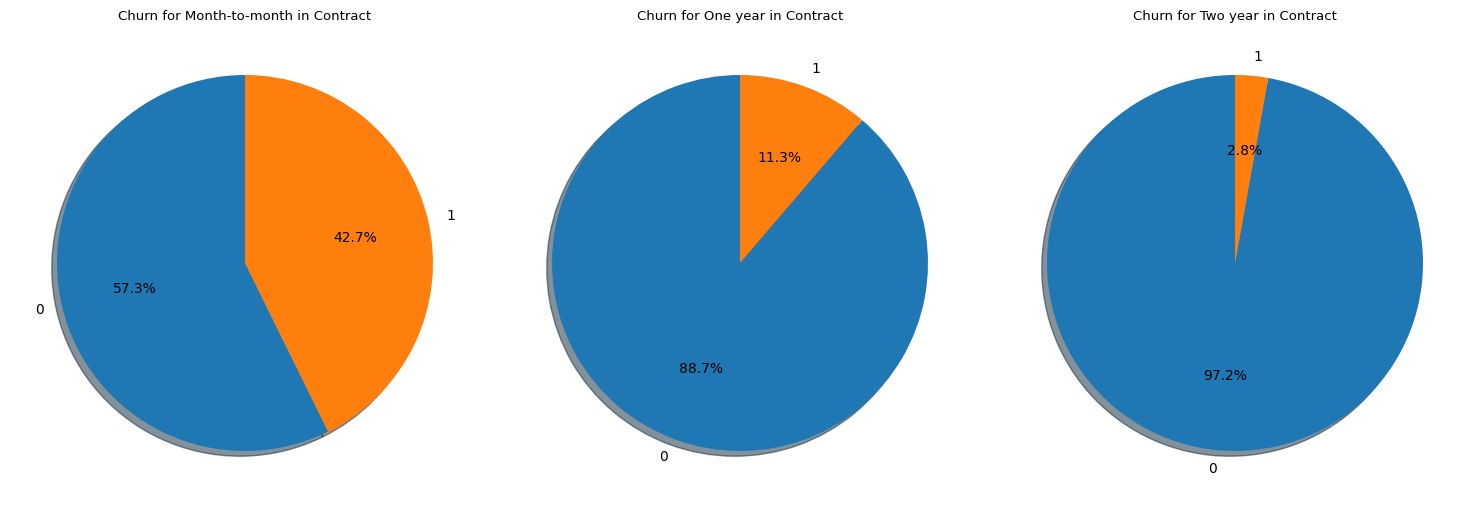

In [44]:
plot_churn_by_category(dataset, 'Contract')

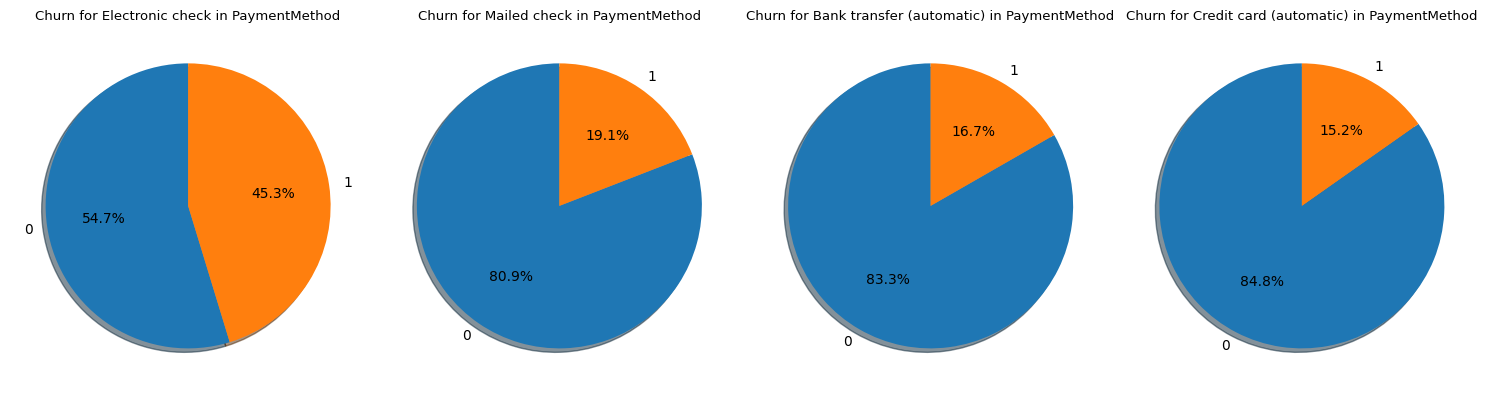

In [45]:
plot_churn_by_category(dataset, 'PaymentMethod')

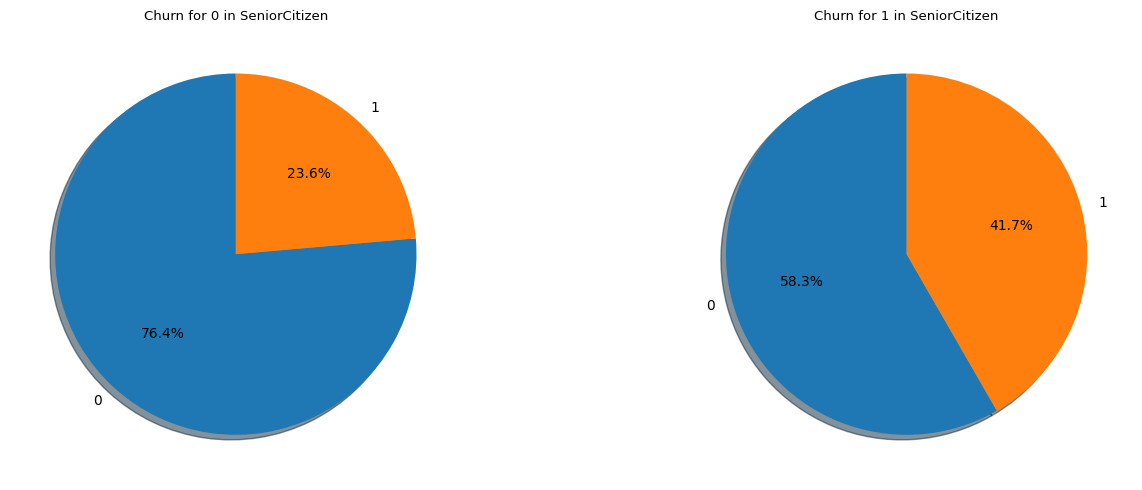

In [46]:
plot_churn_by_category(dataset, 'SeniorCitizen')

# 10. Encode Categorical Data

In [47]:
#Step 11: Encode Categorical data----------------------------------------------------------------

#Incase if user_id is an object:

identity = dataset["customerID"]

dataset = dataset.drop(columns="customerID")

# convert rest of categorical variable into dummy

dataset= pd.get_dummies(dataset, dtype=int)

#Rejoin userid to dataset (column concatenation)

dataset = pd.concat([dataset, identity], axis = 1)


In [48]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,7590-VHVEG
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,5575-GNVDE
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,3668-QPYBK
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,7795-CFOCW
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,6840-RESVB
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,2234-XADUH
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,4801-JZAZL
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,8361-LTMKD


# 11. Removing Identifier

* Earlier, we checked the duplicate data and turns out no duplicate data was detected.
* This makes sense because by default, data is considered duplicated when it has the same value in each column. Given that the `customerID` column clearly has unique values, that's why no duplicates were detected.

In [49]:
# Removing Identifiers-------------------------------------------------------------------
dataset_id = dataset["customerID"]
dataset = dataset.drop(columns="customerID")

In [50]:
print("Jumlah duplikasi: ", dataset.duplicated().sum())

Jumlah duplikasi:  22


In [51]:
dataset.drop_duplicates(inplace=True)

In [52]:
print("Jumlah duplikasi: ", dataset.duplicated().sum())

Jumlah duplikasi:  0


In [53]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


# 12. Split Dataset into Dependent and Independent Variables

In [54]:
#Step 12: Split dataset into dependent and independent variables-----------------------------------

#identify response variable:
X = dataset.drop(columns="Churn")
y = dataset["Churn"]

In [55]:
#Additional Steps to understand better model

#Task 1
Do the exact same modelling process, but with preprocessing : handling imbalance data !

## 13. Generate training and test datasets of dependent and independent variables


In [56]:
#Step 13: Generate training and test datasets of dependent and independent variables-----------------


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size = 0.1,
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (6318, 40)
Number transactions y_train dataset:  (6318,)
Number transactions X_test dataset:  (703, 40)
Number transactions y_test dataset:  (703,)


In [57]:
response = y_train.copy()
print('Raw Data Target Percentage')
print('Churn : {}'.format(response.value_counts()[1]/response.value_counts().sum()*100))
print('Not Churn : {}'.format(response.value_counts()[0]/response.value_counts().sum()*100))

Raw Data Target Percentage
Churn : 26.44824311490978
Not Churn : 73.55175688509021


## 14. Feature Scaling

In [58]:
# Step 14: Feature Scaling-----------------------------------------------------------------------

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

#

## 15. Model Selection

### Step 15.1: Compare Baseline Classification Algorithms

In [59]:
#Step 15.1: Compare Baseline Classification Algorithms - First Iteration
#Using Accuracy and ROC AUC Mean Metrics
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

# Other models
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)))

models.append(('Decision Tree', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

models.append(('SVM', SVC(kernel = 'linear', random_state = 0)))



#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC Std', 'Accuracy Mean', 'Accuracy Std']
model_results = pd.DataFrame(columns=col)


# evaluate each model using k-fold cross-validation
i = 0
for name, model in models:
  kfold = KFold(n_splits=10)
  cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results.loc[i] = [name, round(cv_auc_results.mean()*100,2),
                          round(cv_auc_results.std()*100,2),
                          round(cv_acc_results.mean()*100,2),
                          round(cv_acc_results.std()*100,2)]
  i += 1

results = model_results.sort_values(by=['ROC AUC Mean'], ascending=False)
results

,Algorithm,ROC AUC Mean,ROC AUC Std,Accuracy Mean,Accuracy Std
0,Logistic Regression,84.96,2.66,75.01,2.31
3,SVM,84.04,2.42,80.29,2.36
1,Random Forest,82.80,1.96,78.87,1.73
2,Decision Tree,66.43,2.94,73.73,2.22


### Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons

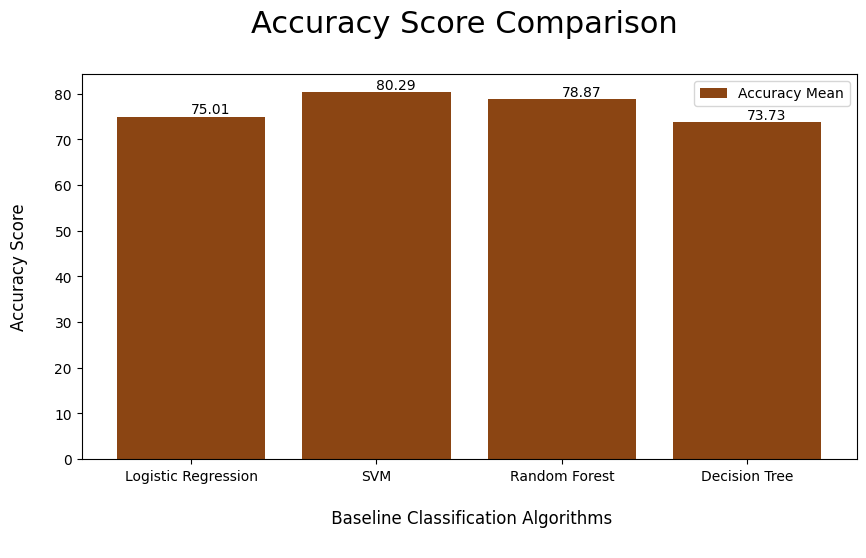

In [60]:
#Step 15.2.  Visualize Classification Algorithms Accuracy Comparisons:-----------------------------------


#Using Accuracy Mean:
plt.figure(figsize=(10,5))
bars = plt.bar(results['Algorithm'], results['Accuracy Mean'], color ='#8B4513', label='Accuracy Mean')
plt.ylabel('Accuracy Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom') # va: vertical alignment

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

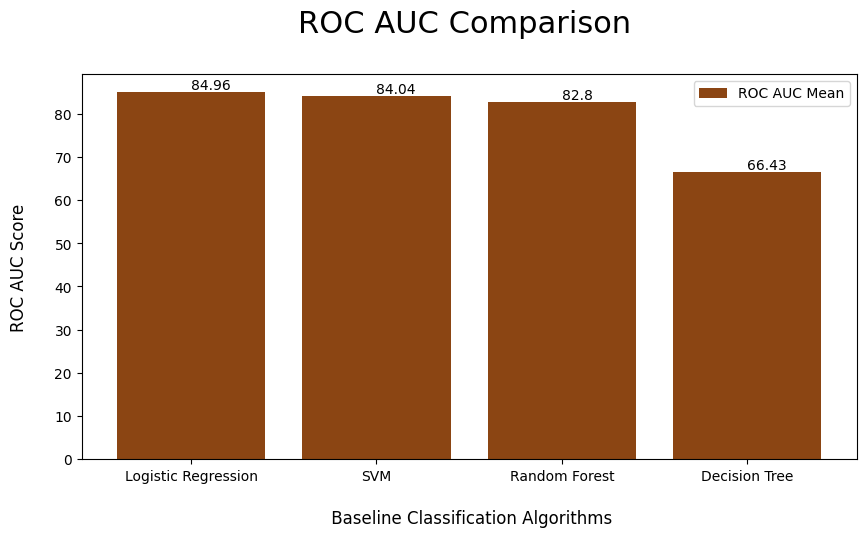

In [61]:
#using Area under ROC Curve:
plt.figure(figsize=(10,5))
bars = plt.bar(results['Algorithm'], results['ROC AUC Mean'], color ='#8B4513', label='ROC AUC Mean')
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom') # va: vertical alignment


plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

### Step 15.3. SMOTE Oversampling

Tahap oversampling ini dilakukan pada tahap setelah data split dan cross validation ROC_AUC Scoring. Lalu hanya diaplikasikan hanya pada training set. Hal tersebut dikarenakan kalau dilakukan pada tahap sebelum splitting dan Cross_validation maka akan merubah hasil validation menjadi 50: 50 sementara seharusnya yaitu sekitar 74 : 26.

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [63]:
print("Before SMOTE:")
print(y_train.value_counts(normalize=True))
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(y_train_smote.value_counts(normalize=True))
print(y_train_smote.value_counts())

Before SMOTE:
Churn
0    0.735518
1    0.264482
Name: proportion, dtype: float64
Churn
0    4647
1    1671
Name: count, dtype: int64

After SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64
Churn
0    4647
1    4647
Name: count, dtype: int64


### 15.4. Searching Optimum Number of Trees for Random Forest Model

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50,100,200,300]}
rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_smote, y_train_smote)

print(grid_search.best_params_)

{'n_estimators': 100}


In [65]:
print(grid_search.best_params_['n_estimators'])

100


###Step 15.4. Compare Baseline Classification Algorithms

In [66]:
#Step 15.4. Compare Baseline Classification Algorithms - Second Iteration-----------------------------
#--Step 15.4.1. Logistic Regression-----------------

models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0,
                                                         class_weight='balanced')))

# Other models
models.append(('Random Forest', RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                                       criterion='entropy',
                                                       random_state = 0)))

models.append(('Decision Tree', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))

models.append(('SVM', SVC(kernel = 'linear', random_state = 0)))



#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC Std', 'Accuracy Mean', 'Accuracy Std']
model_results_sm = pd.DataFrame(columns=col)


# evaluate each model using k-fold cross-validation
i = 0
for name, model in models:
  kfold = StratifiedKFold(n_splits=10)
  cv_acc_results = cross_val_score(model, x_train_smote, y_train_smote, cv=kfold, scoring='accuracy')
  cv_auc_results = cross_val_score(model, x_train_smote, y_train_smote, cv=kfold, scoring='roc_auc')
  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  model_results_sm.loc[i] = [name, round(cv_auc_results.mean()*100,2),
                          round(cv_auc_results.std()*100,2),
                          round(cv_acc_results.mean()*100,2),
                          round(cv_acc_results.std()*100,2)]
  i += 1

results_sm = model_results_sm.sort_values(by=['ROC AUC Mean'], ascending=False)
results_sm

,Algorithm,ROC AUC Mean,ROC AUC Std,Accuracy Mean,Accuracy Std
1,Random Forest,93.25,3.92,85.65,5.98
0,Logistic Regression,86.01,1.15,77.77,1.60
3,SVM,85.85,1.13,76.63,1.91
2,Decision Tree,79.00,5.94,78.89,5.88


###Step 15.5. Visualize the results and compare the baseline algorithms

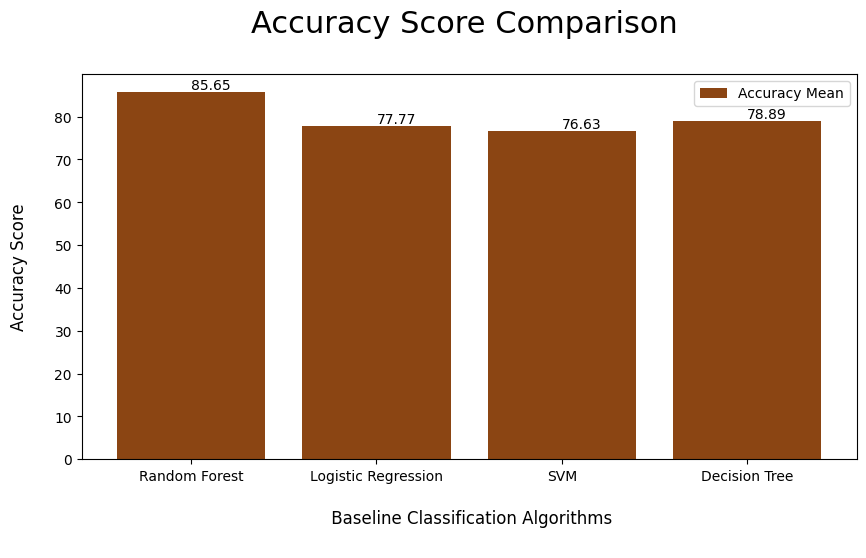

In [67]:

#Step 15.5. Visualize the results and compare the baseline algorithms----------------------------------

# =======================================================================================================================
#Sort results based on the right classification metric:
#(Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)

#Since we have class imbalance. When we look into the business challenge,
# our false negatives will be costly and hence we need to Keep an eye onto the Precision, Recall & F2 score besides accuracy
# =======================================================================================================================
#Using Accuracy Mean:
plt.figure(figsize=(10,5))
bars = plt.bar(results_sm['Algorithm'], results_sm['Accuracy Mean'], color ='#8B4513', label='Accuracy Mean')
plt.ylabel('Accuracy Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom') # va: vertical alignment

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

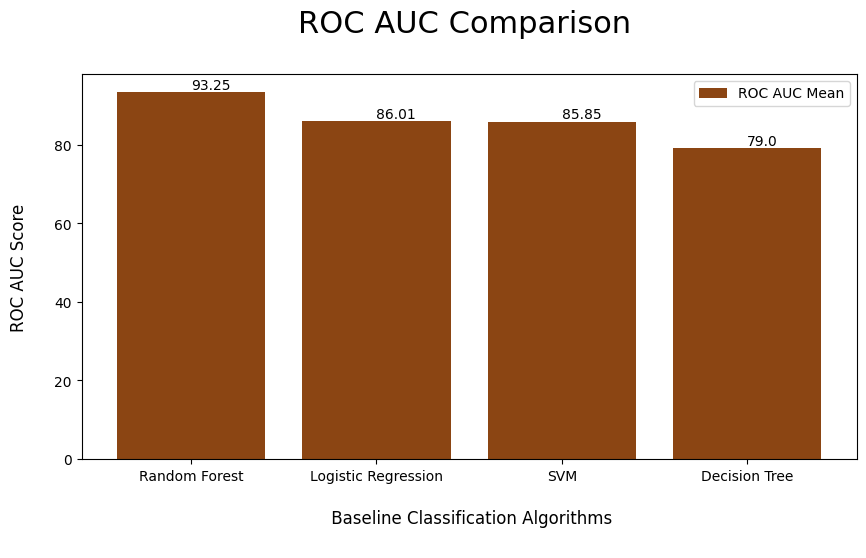

In [68]:
#using Area under ROC Curve:
plt.figure(figsize=(10,5))
bars = plt.bar(results_sm['Algorithm'], results_sm['ROC AUC Mean'], color ='#8B4513', label='ROC AUC Mean')
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom') # va: vertical alignment


plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


plt.show()

## 16. Train & Evaluate Chosen Model

In [69]:
#Step 16: Train & evaluate Chosen Model---------------------------------------------
from sklearn.metrics import classification_report, accuracy_score

# Fit Chosen Model on the Training dataset:
best_model = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
best_model.fit(X_train, y_train)

# Predict the Test set results
y_pred_final = best_model.predict(X_test)


#Evaluate Model Results on Test Set:
cm_rf = confusion_matrix(y_test, y_pred_final)
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

Final Model Accuracy: 0.7709815078236131
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       517
           1       0.60      0.41      0.49       186

    accuracy                           0.77       703
   macro avg       0.70      0.66      0.67       703
weighted avg       0.75      0.77      0.76       703



In [70]:
#Step 16: Train & evaluate Chosen Model---------------------------------------------
from sklearn.metrics import classification_report, accuracy_score

# Fit Chosen Model on the Training dataset:
best_model_sm = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],criterion='entropy', random_state=0)
best_model_sm.fit(x_train_smote, y_train_smote)

# Predict the Test set results
y_pred_final_sm = best_model_sm.predict(X_test)


#Evaluate Model Results on Test Set:
cm_rf_sm = confusion_matrix(y_test, y_pred_final_sm)
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final_sm))
print(classification_report(y_test, y_pred_final_sm))

Final Model Accuracy: 0.7539118065433855
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       517
           1       0.54      0.52      0.53       186

    accuracy                           0.75       703
   macro avg       0.68      0.68      0.68       703
weighted avg       0.75      0.75      0.75       703



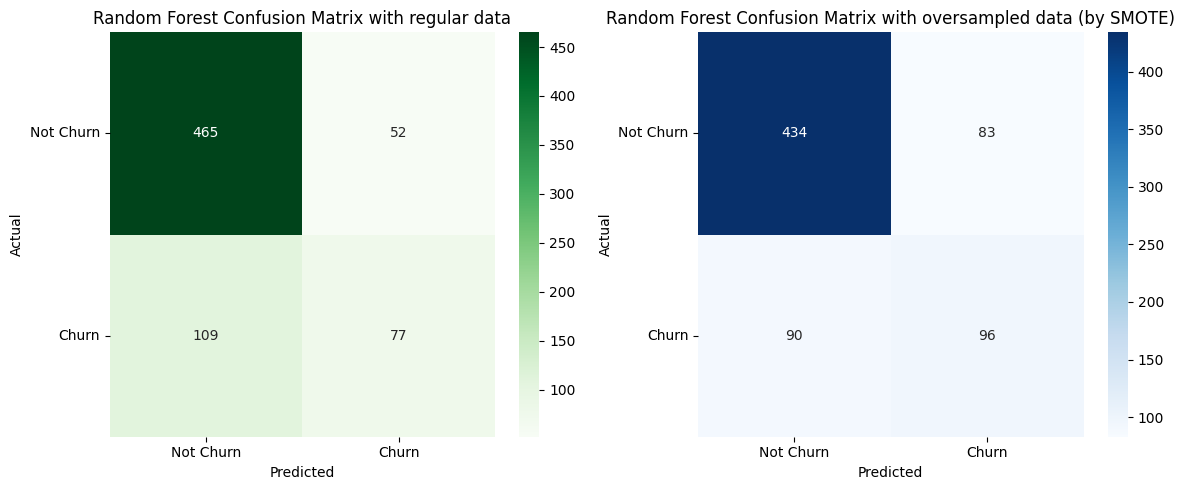

In [71]:
import seaborn as sns

fig,axes = plt.subplots(1,2,figsize=(12,5))

class_names = ['Not Churn', 'Churn']

sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens", ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix with regular data')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].xaxis.set_ticklabels(class_names)
axes[0].yaxis.set_ticklabels(class_names, rotation=0)

sns.heatmap(cm_rf_sm, annot=True, fmt='d', cmap="Blues", ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix with oversampled data (by SMOTE)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].xaxis.set_ticklabels(class_names)
axes[1].yaxis.set_ticklabels(class_names, rotation=0)

plt.tight_layout()
plt.show()

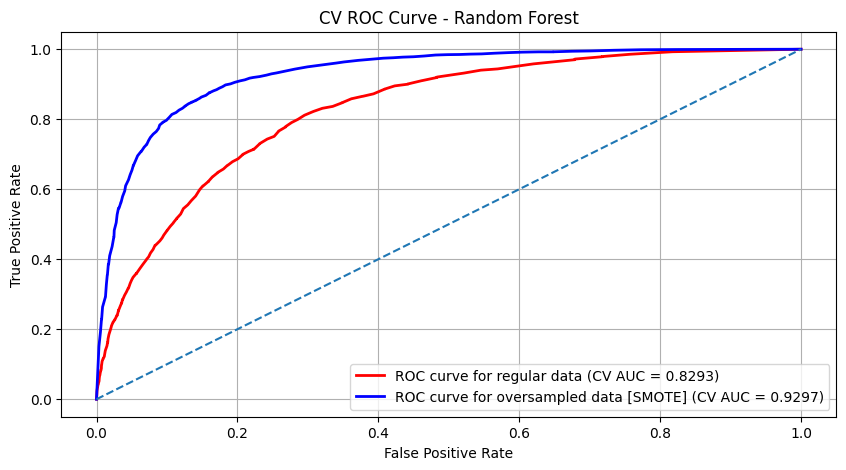

In [72]:
# Evaluate the model using ROC Graph
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score

y_cv_probs = cross_val_predict(best_model, X_train, y_train, cv=10, method='predict_proba')[:, 1]
y_cv_probs_sm = cross_val_predict(best_model_sm, x_train_smote, y_train_smote, cv=10, method='predict_proba')[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_cv_probs)
roc_auc = roc_auc_score(y_train, y_cv_probs)

fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_train_smote, y_cv_probs_sm)
roc_auc_sm = roc_auc_score(y_train_smote, y_cv_probs_sm)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve for regular data (CV AUC = %0.4f)' % roc_auc)
plt.plot(fpr_sm, tpr_sm, color='blue', lw=2, label='ROC curve for oversampled data [SMOTE] (CV AUC = %0.4f)' % roc_auc_sm)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CV ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Berdasarkan plort kurva ROC, diperoleh SMOTE pada training data mampu memberikan performa yang lebih baik dibandingkan tanpa SMOTE. Hal ini, dapat dilihat pada kurva diatas, di mana kurva ROC (biru) yang semakin ke titik (0,1) untuk SMOTE, dan nilai AUC dengan masing-masing nilai AUC 92,97% dan 82,93% untuk percobaan dengan oversampling dan tanpa oversampling.

##Analysis

---



In [73]:
print ('Result Before Oversampling : ')
print (results)
print ('  ')
print ('Result After Oversampling : ')
print (results_sm)

Result Before Oversampling : 
             Algorithm  ROC AUC Mean  ROC AUC Std  Accuracy Mean  Accuracy Std
0  Logistic Regression         84.96         2.66          75.01          2.31
3                  SVM         84.04         2.42          80.29          2.36
1        Random Forest         82.80         1.96          78.87          1.73
2        Decision Tree         66.43         2.94          73.73          2.22
  
Result After Oversampling : 
             Algorithm  ROC AUC Mean  ROC AUC Std  Accuracy Mean  Accuracy Std
1        Random Forest         93.25         3.92          85.65          5.98
0  Logistic Regression         86.01         1.15          77.77          1.60
3                  SVM         85.85         1.13          76.63          1.91
2        Decision Tree         79.00         5.94          78.89          5.88


Apa insight yang bisa didapat dengan handling data imbalance pada data diatas? Teknik apa yang anda gunakan? Jelaskan!

Answer:
Menangani data tidak seimbang menggunakan SMOTE membantu meningkatkan performa model, terutama ketika kelas minoritas jauh lebih sedikit dibanding kelas mayoritas. Hal ini dibuktikan pada beberapa pernyataan berikut.

Dari komparasi training kedua model diperoleh sebagai berikut:
1. Penurunan nilai precision daari 0.60 ke 0.54, yang berarti adanya peningkatan False Churn
2. Peningkatan nilai recall dari 0.49 ke 0.53, yang berarti adanya peningkatan True Churn dan penurunan False Churn

Jika memfokuskan analisis pada kelas "churn", metode SMOTE memperbaiki nilai recall. Dengan kata lain, model mampu mengidentifikasi kelas 'churn' lebih baik dan mengurangi risiko adanya kesalahann prediksi dari kelas tersebut. Tetapi, jika analisis difokuskan pada kelas 'not churn', maka SMOTE menurunkan nilai accuracy. Hal ini merupakan salah satu tradeoff untuk menangkap kelas 'churn' lebih baik.